In [5]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Patch
import numpy as np
import pandas as pd
import os

Read all  data in folder

In [6]:
subject_num = "0000"

directory = r"Merged/"+subject_num
baseline_dir = rf"Baseline/baseline_ECG_{subject_num}_"

#should make new merged

csv = {}

for file in os.listdir(directory):
    fn = file.split("_")[-1].split(".")[0]
    csv[fn] = pd.read_csv(os.path.join(directory, file))

Classlify Man
plot in garph 
save pics 

C:\Users\66990\AppData\Local\Temp\ipykernel_30908\1974814757.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('Set3')


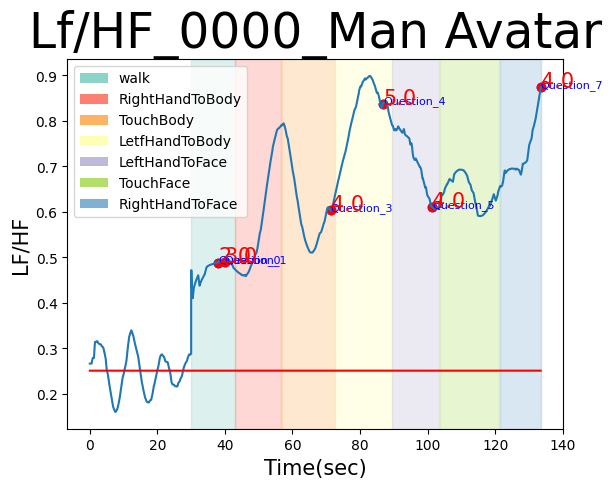

In [17]:
man_data = csv["Man"]
man_data.Character_status = man_data.Character_status.fillna('walk')

man_base_data = pd.read_csv(baseline_dir + "Man.csv")
baseline = np.mean(man_base_data["HRV_LFHF"])

x = np.concatenate([man_base_data["time"], man_data["time"] + 30])
y = np.concatenate([man_base_data["HRV_LFHF"], man_data["HRV_LFHF"]])


fig, ax = plt.subplots()
plt.plot(x, y)
plt.plot(x, [baseline] * len(x), "r-")
plt.title('Lf/HF_0000_Man Avatar',fontsize = 35)
plt.xlabel('Time(sec)', fontsize=15)
plt.ylabel('LF/HF',fontsize = 15)

for key in csv.keys():
    if 'norm_time' in csv[key].columns:
        csv[key] = csv[key].drop(columns=['norm_time'])
    csv[key] = csv[key].drop_duplicates(subset=['time'])

statuses = {
    "walk":0,
    "LetfHandToBody":1,
    "LeftHandToFace":2,
    "RightHandToBody":3,
    "RightHandToFace":4,
    "TouchBody":5,
    "TouchFace":6,
}

cmap = matplotlib.cm.get_cmap('Set3')

for status in man_data['Character_status'].unique():
    bounds = man_data[['time', 'Character_status']].groupby('Character_status').agg(['min', 'max']).loc[status]
    ax.axvspan(bounds.min()+30, bounds.max()+30, alpha=0.3, color=cmap.colors[statuses[status]])
    
questions = man_data.dropna(subset=['Form_Question'])
answers = man_data.dropna(subset=['Form_Answer'])

plt.scatter(questions['time'] + 30, questions['HRV_LFHF'], color='blue', label='Form_Question')
plt.scatter(answers['time'] + 30, answers['HRV_LFHF'], color='red', label='Form_Answer')

for i, row in questions.iterrows():
     plt.text(row['time']+30, row['HRV_LFHF'], str(row['Form_Question']), fontsize=8, color='blue')

for i, row in answers.iterrows():
    plt.text(row['time']+30, row['HRV_LFHF'], str(row['Form_Answer']), fontsize=15, color='red')
    
legend = [Patch(facecolor=cmap.colors[statuses[c]], label=c) for c in man_data['Character_status'].unique()]
ax.legend(handles=legend)

desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "SavepicsLFHF")
os.makedirs(desktop_path, exist_ok=True)
plt.savefig(os.path.join(desktop_path, "0000_Man.png"))





Classlify Woman
plot in garph 
save pics 

C:\Users\66990\AppData\Local\Temp\ipykernel_30908\2312197233.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('Set3')


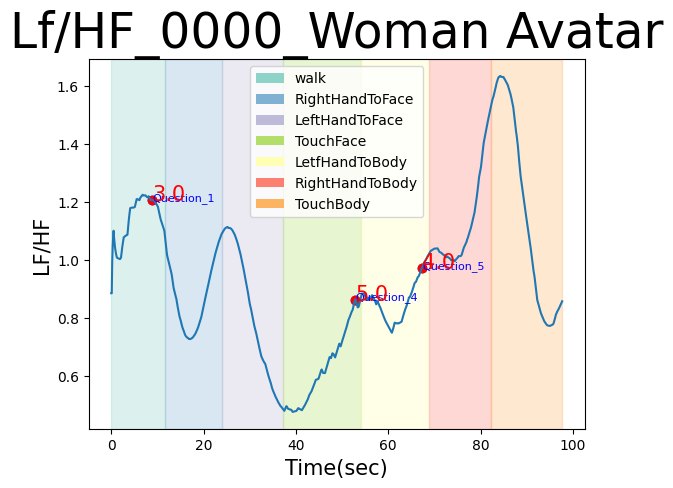

In [8]:
man_data = csv["Woman"]
man_data.Character_status = man_data.Character_status.fillna('walk')

fig, ax = plt.subplots()
plt.plot(man_data["time"], man_data["HRV_LFHF"])
plt.title('Lf/HF_0000_Woman Avatar',fontsize = 35)
plt.xlabel('Time(sec)', fontsize=15)
plt.ylabel('LF/HF',fontsize = 15)

statuses = {
    "walk":0,
    "LetfHandToBody":1,
    "LeftHandToFace":2,
    "RightHandToBody":3,
    "RightHandToFace":4,
    "TouchBody":5,
    "TouchFace":6,
}

cmap = matplotlib.cm.get_cmap('Set3')

for status in man_data['Character_status'].unique():
    bounds = man_data[['time', 'Character_status']].groupby('Character_status').agg(['min', 'max']).loc[status]
    ax.axvspan(bounds.min(), bounds.max(), alpha=0.3, color=cmap.colors[statuses[status]])
    
questions = man_data.dropna(subset=['Form_Question'])
answers = man_data.dropna(subset=['Form_Answer'])

plt.scatter(questions['time'], questions['HRV_LFHF'], color='blue', label='Form_Question')
plt.scatter(answers['time'], answers['HRV_LFHF'], color='red', label='Form_Answer')

for i, row in questions.iterrows():
    plt.text(row['time'], row['HRV_LFHF'], str(row['Form_Question']), fontsize=8, color='blue')

for i, row in answers.iterrows():
    plt.text(row['time'], row['HRV_LFHF'], str(row['Form_Answer']), fontsize=15, color='red')
    
legend = [Patch(facecolor=cmap.colors[statuses[c]], label=c) for c in man_data['Character_status'].unique()]
ax.legend(handles=legend)

desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "SavepicsLFHF")
os.makedirs(desktop_path, exist_ok=True)
plt.savefig(os.path.join(desktop_path, "0000_Woman.png")) 


Classlify Robot
plot in garph 
save pics 

C:\Users\66990\AppData\Local\Temp\ipykernel_30908\2733463338.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('Set3')


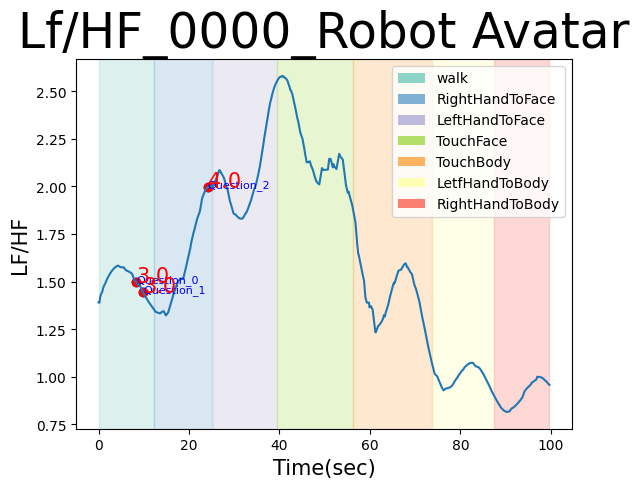

In [9]:
man_data = csv["Robot"]
man_data.Character_status = man_data.Character_status.fillna('walk')

fig, ax = plt.subplots()
plt.plot(man_data["time"], man_data["HRV_LFHF"])
plt.title('Lf/HF_0000_Robot Avatar',fontsize = 35)
plt.xlabel('Time(sec)', fontsize=15)
plt.ylabel('LF/HF',fontsize = 15)



statuses = {
    "walk":0,
    "LetfHandToBody":1,
    "LeftHandToFace":2,
    "RightHandToBody":3,
    "RightHandToFace":4,
    "TouchBody":5,
    "TouchFace":6,
}

cmap = matplotlib.cm.get_cmap('Set3')

for status in man_data['Character_status'].unique():
    bounds = man_data[['time', 'Character_status']].groupby('Character_status').agg(['min', 'max']).loc[status]
    ax.axvspan(bounds.min(), bounds.max(), alpha=0.3, color=cmap.colors[statuses[status]])
    
questions = man_data.dropna(subset=['Form_Question'])
answers = man_data.dropna(subset=['Form_Answer'])

plt.scatter(questions['time'], questions['HRV_LFHF'], color='blue', label='Form_Question')
plt.scatter(answers['time'], answers['HRV_LFHF'], color='red', label='Form_Answer')

for i, row in questions.iterrows():
    plt.text(row['time'], row['HRV_LFHF'], str(row['Form_Question']), fontsize=8, color='blue')

for i, row in answers.iterrows():
    plt.text(row['time'], row['HRV_LFHF'], str(row['Form_Answer']), fontsize=15, color='red')
    
legend = [Patch(facecolor=cmap.colors[statuses[c]], label=c) for c in man_data['Character_status'].unique()]
ax.legend(handles=legend)

desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "SavepicsLFHF")
os.makedirs(desktop_path, exist_ok=True)
plt.savefig(os.path.join(desktop_path, "0000_Robot.png"))  